Importing Libraries

In [30]:
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import numpy as np

Visualiza images

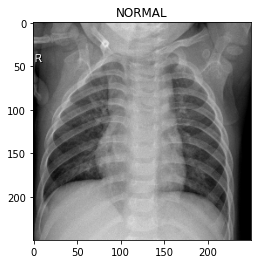

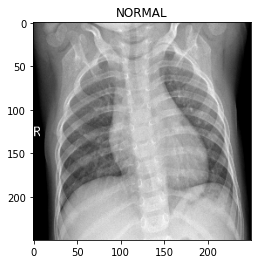

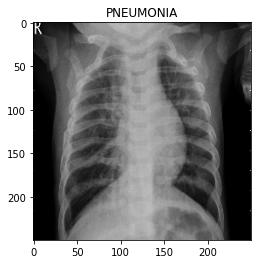

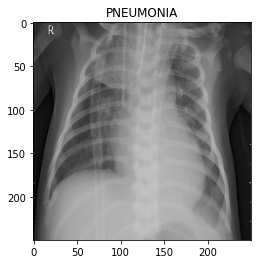

In [31]:
# Let's visualize two images for each categoric, which is a normal lung(NORMAL) and a lung with some type of bacteria or infection(Pneumonia)

data_dir = ('../content/drive/MyDrive/Datasets_of_xrays/train')
categories = ['NORMAL', 'PNEUMONIA']
for i in categories:
    path = os.path.join(data_dir, i)
    num = 0
    for img in os.listdir(path):
        if num != 2:
            img_array = cv2.imread(os.path.join(path,img))
            img_array = cv2.resize(img_array, (250, 250))
            plt.imshow(img_array)
            plt.title(i)
            plt.show()
            num +=1
        else:
            break

In [32]:
# Now, let's see the shape of the one image

image_files = os.listdir(path)
image = os.path.join(path, image_files[0])
image = cv2.imread(image)
image.shape


(680, 1056, 3)

Gpu Status

In [33]:
torch.cuda.is_available()

True

In [34]:
# Creating a variable with the gpu, it will be needed later

device = torch.device('cuda:0')

In [35]:
# Saving the path to the normal files 

normal = "NORMAL"
normal_path = os.path.join(data_dir, normal)
normal_files = [os.path.join(normal_path,file) for file in  os.listdir(normal_path) if file.endswith(".jpeg")]
normal_files.sort()

normal_files[0]

'../content/drive/MyDrive/Datasets_of_xrays/train/NORMAL/IM-0115-0001.jpeg'

In [36]:
# Saving the path to the pneumonia files 
pneu = "PNEUMONIA"
pneu_path = os.path.join(data_dir, pneu)
pneu_files = [os.path.join(pneu_path,file) for file in  os.listdir(pneu_path) if file.endswith(".jpeg")]
pneu_files.sort()

pneu_files[0:5]


['../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1000_bacteria_2931.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1000_virus_1681.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1001_bacteria_2932.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1002_bacteria_2933.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1003_bacteria_2934.jpeg']

In [37]:
number_of_samples = len(normal_files) + len(pneu_files)
number_of_samples

5216

In [38]:
# Creating a long tensor that will contain the labels.

Y=torch.zeros([number_of_samples])
Y=Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

In [39]:
# So i'm creating the labels here, were 0 is normal files(file 1 to 1341) and 1 is the pneumonia files(file 1341 to 5216)

Y[:1341] = 0
Y[1341:]= 1


In [40]:
# Join the files
all_files = normal_files + pneu_files

In [41]:
# See the results here

all_files[1339:1345]

['../content/drive/MyDrive/Datasets_of_xrays/train/NORMAL/NORMAL2-IM-1422-0001.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/NORMAL/NORMAL2-IM-1423-0001.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1000_bacteria_2931.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1000_virus_1681.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1001_bacteria_2932.jpeg',
 '../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1002_bacteria_2933.jpeg']

In [42]:
# And the labels are correct

Y.tolist()[1339:1345]

[0, 0, 1, 1, 1, 1]

../content/drive/MyDrive/Datasets_of_xrays/train/NORMAL/NORMAL2-IM-1422-0001.jpeg


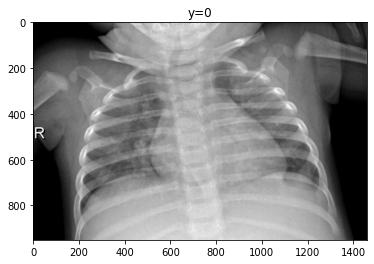

../content/drive/MyDrive/Datasets_of_xrays/train/NORMAL/NORMAL2-IM-1423-0001.jpeg


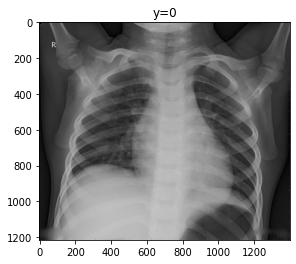

../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1000_bacteria_2931.jpeg


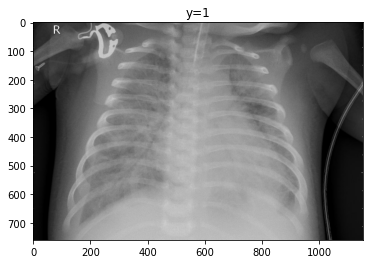

../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1000_virus_1681.jpeg


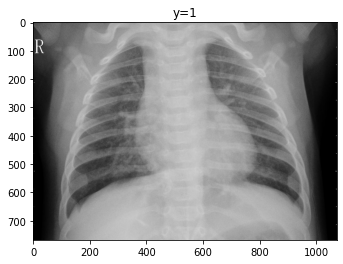

../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1001_bacteria_2932.jpeg


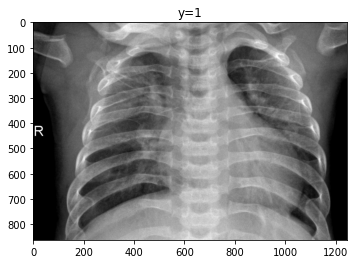

../content/drive/MyDrive/Datasets_of_xrays/train/PNEUMONIA/person1002_bacteria_2933.jpeg


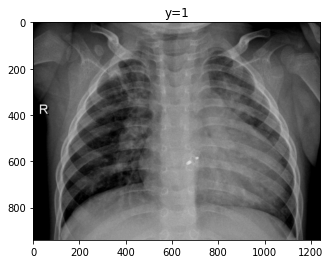

In [43]:
# For some better understanding, let's see the files with their paths and labesl

for y,file in zip(Y.tolist()[1339:1345], all_files[1339:1345]):
    print(file)
    plt.imshow(cv2.imread(file))
    plt.title("y="+str(y))
    plt.show()


Data Preparation

In [44]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None, train=True):
        # The training data
        if train:
            directory= "../content/drive/MyDrive/Datasets_of_xrays/train"
            normal = "NORMAL"
            pneu = "PNEUMONIA"

            normal_file_path = os.path.join(directory,normal)
            pneu_file_path = os.path.join(directory,pneu)

            normal_files = [os.path.join(normal_file_path,file) for file in  os.listdir(normal_file_path) if file.endswith(".jpeg")]
            normal_files.sort()

            pneu_files = [os.path.join(pneu_file_path,file) for file in  os.listdir(pneu_file_path) if file.endswith(".jpeg")]
            pneu_files.sort()

            number_of_samples = len(normal_files) + len(pneu_files)

            all_files = [None]*number_of_samples
            all_files[:len(normal_files)] = normal_files
            all_files[len(normal_files):] = pneu_files
            self.all_files = all_files
             # Saving the lenght
            self.len = len(self.all_files)
            
            # The transform is goint to be used on image
            self.transform = transform
            
            #torch.LongTensor with the labels
            Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
            Y[:len(normal_files)] = 0
            Y[len(normal_files):] = 1
            self.Y = Y
       
    # validation data    
        else:
            directory= "../content/drive/MyDrive/Datasets_of_xrays/test"
            normal = "NORMAL"
            pneu = "PNEUMONIA"

            normal_file_path = os.path.join(directory,normal)
            pneu_file_path = os.path.join(directory,pneu)

            normal_files = [os.path.join(normal_file_path,file) for file in  os.listdir(normal_file_path) if file.endswith(".jpeg")]
            normal_files.sort()

            pneu_files = [os.path.join(pneu_file_path,file) for file in  os.listdir(pneu_file_path) if file.endswith(".jpeg")]
            pneu_files.sort()

            number_of_samples = len(normal_files) + len(pneu_files)

            all_files=[None]*number_of_samples
            all_files[:len(normal_files)]= normal_files
            all_files[len(normal_files):]= pneu_files
            self.all_files = all_files
            
            # Saving the lenght
            self.len = len(self.all_files)
            
            # The transform is goint to be used on image
            self.transform = transform
            #torch.LongTensor
            Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
            Y[:len(normal_files)] = 0
            Y[len(normal_files):] = 1
            self.Y = Y



        # Get the length
    def __len__(self):
        return self.len

         # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)
            
            
            
            
            

        return image, y



In [45]:
# For the purpose of this code to run light, let's resize the images to 250x250. Also, the images are in different sizes, so we need to fix this.
IMAGE_SIZE = 250


# Composed function (Works as a pipeline for the transforms that we need make on the imagens)
# For the normalizer, a already calculate the mean and std of the images. (Just one mean because I gonna grayscale the images, if I use RGB, it would need 3 mean and std, one for each channel)
composed_train = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor(), transforms.Normalize(0.4823, 0.2363)])
composed_test = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor(), transforms.Normalize(0.4747, 0.2361)])


In [46]:
# Creating the datasets through the class
dataset_train = Dataset(transform=composed_train,train=True)
dataset_val = Dataset(transform=composed_test,train=False)


In [47]:
# Position 0 is the imagens
dataset_train[0][0].shape

torch.Size([1, 250, 250])

In [48]:
# The dataloaders for the model.
# only batch size of 32 run in this code, others sizes like 64 or plus gets CUDA error (Lack of memory)
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=32, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=32, shuffle=True, num_workers=1)


Model

In [49]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self):
        super(CNN, self).__init__()
        # Conv1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=0)
        self.conv1_bn = nn.BatchNorm2d(64)
        self.maxpool1=nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Conv2
        self.cnn2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5,stride=1, padding=0)
        self.conv2_bn = nn.BatchNorm2d(128)
        self.maxpool2=nn.MaxPool2d(kernel_size=2, stride=1)  
        
        # Conv3
        self.cnn3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5,stride=1, padding=0)
        self.conv3_bn = nn.BatchNorm2d(256)
        self.maxpool3=nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Conv4
        self.cnn4 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=5,stride=1, padding=0)
        self.conv4_bn = nn.BatchNorm2d(128)
        self.maxpool4=nn.MaxPool2d(kernel_size=2, stride=1)
        
        # Conv5
        self.cnn5 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=5,stride=1, padding=0)
        self.conv5_bn = nn.BatchNorm2d(32)
        self.maxpool5=nn.MaxPool2d(kernel_size=2, stride=2)
        
      
        # Fully connected layer 1
        self.drop_out1 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(in_features=32 * 24 * 24, out_features=500)
        self.bn_fc1 = nn.BatchNorm1d(500)
        
         # Fully connected layer 2
        self.drop_out2 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(in_features=500, out_features=1000)
        self.bn_fc2 = nn.BatchNorm1d(1000)
        
         # Fully connected layer 3
        self.drop_out3 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(in_features=1000, out_features=1000)
        self.bn_fc3 = nn.BatchNorm1d(1000)
        
         # Fully connected layer 4
        self.drop_out4 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(in_features=1000, out_features=500)
        self.bn_fc4 = nn.BatchNorm1d(500)
        
         # Fully connected layer 5
        self.drop_out5 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(in_features=500, out_features=250)
        self.bn_fc5 = nn.BatchNorm1d(250)
        
         # Fully connected layer 6 
        self.fc6 = nn.Linear(in_features=250, out_features=2)
        
    
        
    
    # For Prediction
    def forward(self, x):
        # conv1
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        # conv2
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        # conv3
        x = self.cnn3(x)
        x = self.conv3_bn(x)
        x = torch.relu(x)
        x = self.maxpool3(x)
        # conv4
        x = self.cnn4(x)
        x = self.conv4_bn(x)
        x = torch.relu(x)
        x = self.maxpool4(x)
        # conv5
        x = self.cnn5(x)
        x = self.conv5_bn(x)
        x = torch.relu(x)
        x = self.maxpool5(x)
        
        # Fcl1
        x = x.view(x.size(0), -1)
        x = self.drop_out1(x)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        x = torch.relu(x)
        # Fcl2
        x = self.drop_out2(x)
        x = self.fc2(x)
        x = self.bn_fc2(x)
        x = torch.relu(x)
        # Fcl3
        x = self.drop_out3(x)
        x = self.fc3(x)
        x = self.bn_fc3(x)
        x = torch.relu(x)
        # Fcl4
        x = self.drop_out4(x)
        x = self.fc4(x)
        x = self.bn_fc4(x)
        x = torch.relu(x)
        # Fcl5
        x = self.drop_out5(x)
        x = self.fc5(x)
        x = self.bn_fc5(x)
        x = torch.relu(x)
        # final fcl
        x = self.fc6(x)
        #x = torch.sigmoid(x)
       
        return x

In [50]:
def train_model(model,train_loader,test_loader,optimizer,n_epochs=100):
    
    # For computing the accuracy and loss
    N_test=len(dataset_val)
    accuracy_list=[]
    loss_list=[]
    
    for epoch in range(n_epochs):
        cost = 0
        model.train()
        print(f"Epoch: {epoch + 1}")
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)   # passing the variables to gpu
            
            optimizer.zero_grad()  # resetting the gradient
            z = model(x)           # Fiting the data
            #y = y.unsqueeze(-1)    # in case of we use BCELoss as criterion
            #y = y.float()
            loss = criterion(z, y)   # Passing to the loss funtion with Cross Entropy
            
            loss.backward()    # backpropagation
            optimizer.step()   # updating the weights
           
            cost+=loss.item()   

        correct=0
        model.eval()
        #perform a prediction on the validation  data  
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)  # passing the variables to gpu
            
            z = model(x_test)                  # making a prediction
            _, yhat = torch.max(z.data, 1)     # threshold
            correct += (yhat == y_test).sum().item()      # Saving the corrects predictions
        accuracy = correct / N_test                       # Getting the accuracy
        print(f"correct: {correct}, N_test: {N_test}")
        accuracy_list.append(accuracy)
        loss_list.append(cost)
        print(f"------>  loss: {round(cost, 8)}, accuracy_val: %{accuracy * 100}")
    
     
    return accuracy_list, loss_list

In [51]:
# Creating the model and passing it to the gpu
model = CNN()
model.to(device)

CNN(
  (cnn1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (conv3_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn4): Conv2d(256, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn5): Conv2d

In [52]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [53]:
  # Training the model for 10 epochs
accuracy_list, loss_list = train_model(model=model,n_epochs=10, train_loader=train_loader,test_loader = test_loader,optimizer=optimizer)

Epoch: 1
correct: 437, N_test: 624
------>  loss: 27.80903572, accuracy_val: %70.03205128205127
Epoch: 2
correct: 480, N_test: 624
------>  loss: 18.85041787, accuracy_val: %76.92307692307693
Epoch: 3
correct: 524, N_test: 624
------>  loss: 16.45522837, accuracy_val: %83.97435897435898
Epoch: 4
correct: 478, N_test: 624
------>  loss: 13.35335658, accuracy_val: %76.6025641025641
Epoch: 5
correct: 446, N_test: 624
------>  loss: 12.04921343, accuracy_val: %71.47435897435898
Epoch: 6
correct: 509, N_test: 624
------>  loss: 12.55860307, accuracy_val: %81.57051282051282
Epoch: 7
correct: 493, N_test: 624
------>  loss: 10.02404244, accuracy_val: %79.00641025641025
Epoch: 8
correct: 532, N_test: 624
------>  loss: 8.41446378, accuracy_val: %85.25641025641025
Epoch: 9
correct: 440, N_test: 624
------>  loss: 9.17593784, accuracy_val: %70.51282051282051
Epoch: 10
correct: 490, N_test: 624
------>  loss: 7.57374679, accuracy_val: %78.52564102564102


Evaluation

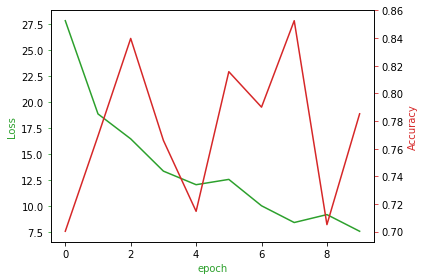

In [55]:
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [56]:
def train_model(model,train_loader,test_loader,optimizer,n_epochs=100):
    
    # For computing the accuracy and loss
    N_test=len(dataset_train)
    accuracy_list=[]
    loss_list=[]
    
    for epoch in range(n_epochs):
        cost = 0
        model.train()
        print(f"Epoch: {epoch + 1}")
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)   # passing the variables to gpu
            
            optimizer.zero_grad()  # resetting the gradient
            z = model(x)           # Fiting the data
            #y = y.unsqueeze(-1)    # in case of we use BCELoss as criterion
            #y = y.float()
            loss = criterion(z, y)   # Passing to the loss funtion with Cross Entropy
            
            loss.backward()    # backpropagation
            optimizer.step()   # updating the weights
           
            cost+=loss.item()   

        correct=0
        model.eval()
        #perform a prediction on the validation  data  
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)  # passing the variables to gpu
            
            z = model(x_test)                  # making a prediction
            _, yhat = torch.max(z.data, 1)     # threshold
            correct += (yhat == y_test).sum().item()      # Saving the corrects predictions
        accuracy = correct / N_test                       # Getting the accuracy
        print(f"correct: {correct}, N_test: {N_test}")
        accuracy_list.append(accuracy)
        loss_list.append(cost)
        print(f"------>  loss: {round(cost, 8)}, accuracy_train: %{accuracy * 100}")
    
     
    return accuracy_list, loss_list

In [57]:
# Creating the model and passing it to the gpu
model = CNN()
model.to(device)

CNN(
  (cnn1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (conv3_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn4): Conv2d(256, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn5): Conv2d

In [58]:
 # Training the model for 10 epochs
accuracy_list, loss_list = train_model(model=model,n_epochs=10, train_loader=train_loader,test_loader = test_loader,optimizer=optimizer)

Epoch: 1
correct: 389, N_test: 5216
------>  loss: 103.94337273, accuracy_train: %7.45782208588957
Epoch: 2
correct: 388, N_test: 5216
------>  loss: 103.79519582, accuracy_train: %7.438650306748467
Epoch: 3
correct: 396, N_test: 5216
------>  loss: 103.73093885, accuracy_train: %7.592024539877301
Epoch: 4
correct: 392, N_test: 5216
------>  loss: 103.47203034, accuracy_train: %7.515337423312883
Epoch: 5
correct: 387, N_test: 5216
------>  loss: 104.24606842, accuracy_train: %7.419478527607362
Epoch: 6
correct: 392, N_test: 5216
------>  loss: 103.31237498, accuracy_train: %7.515337423312883
Epoch: 7
correct: 391, N_test: 5216
------>  loss: 103.72368598, accuracy_train: %7.4961656441717786
Epoch: 8
correct: 397, N_test: 5216
------>  loss: 103.645208, accuracy_train: %7.611196319018405
Epoch: 9
correct: 391, N_test: 5216
------>  loss: 102.88957399, accuracy_train: %7.4961656441717786
Epoch: 10
correct: 389, N_test: 5216
------>  loss: 103.76368982, accuracy_train: %7.45782208588957


Evaluation

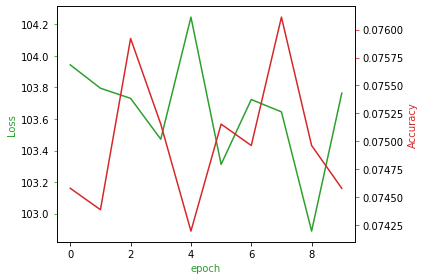

In [59]:
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()